# Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from skopt import BayesSearchCV
from sklearn.metrics import f1_score


# Nạp dữ liệu

In [2]:
df = pd.read_csv('data_dotquy.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Tiền xử lý dữ liệu

In [3]:
df.info()# Xem kiểu dữ liệu (Dtype) và số lượng giá trị không rỗng
df.head()
# Ta thấy cột BMI chỉ có 4909-> Bị thiếu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.isnull().sum()
# Kiểm tra xem bị thiếu bao nhiêu dòng

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df.duplicated().sum()
# Không có cái nào bị trùng lặp

np.int64(0)

In [6]:
df.describe(include='all') # Xem min, max, mean, median

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [7]:
for col in df.columns:
    print(f"--- Kiểm tra cột: {col} ---")
    print(df[col].value_counts())
    print("\n") # Xuống dòng cho dễ nhìn

--- Kiểm tra cột: id ---
id
44679    1
9046     1
51676    1
31112    1
60182    1
        ..
12109    1
60491    1
27419    1
10434    1
53882    1
Name: count, Length: 5110, dtype: int64


--- Kiểm tra cột: gender ---
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


--- Kiểm tra cột: age ---
age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: count, Length: 104, dtype: int64


--- Kiểm tra cột: hypertension ---
hypertension
0    4612
1     498
Name: count, dtype: int64


--- Kiểm tra cột: heart_disease ---
heart_disease
0    4834
1     276
Name: count, dtype: int64


--- Kiểm tra cột: ever_married ---
ever_married
Yes    3353
No     1757
Name: count, dtype: int64


--- Kiểm tra cột: work_type ---
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


--- Kiểm tra

# Làm sạch dữ liệu

In [8]:
# Xóa cột id
df = df.drop(columns=['id'])
print(df)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smok

In [9]:
# Xóa 1 cột giới tính khac nam, nữ (other) 
mask = df['gender'].isin(['Male', 'Female'])
df = df[mask]

In [10]:
# Biến đổi Gender thành số(Male=0, Female=1)
df.loc[:, 'gender'] = df['gender'].replace({'Female': 1, 'Male': 0})


C:\Users\HaiRuaLap\AppData\Local\Temp\ipykernel_9660\1438257179.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'gender'] = df['gender'].replace({'Female': 1, 'Male': 0})


In [11]:
# Biến đổi ever_married thành số(Male=0, Female=1)
df.loc[:, 'ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})


C:\Users\HaiRuaLap\AppData\Local\Temp\ipykernel_9660\4053592691.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})


In [12]:
#Biến đổi work_type thành số
df.loc[:, 'work_type'] = df['work_type'].replace({'Govt_job': 0, 'Never_worked': 1,'Private': 2, 'Self-employed': 3,'children': 4})


C:\Users\HaiRuaLap\AppData\Local\Temp\ipykernel_9660\3250496890.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'work_type'] = df['work_type'].replace({'Govt_job': 0, 'Never_worked': 1,'Private': 2, 'Self-employed': 3,'children': 4})


In [13]:
#Biến đổi Residence_type thành số
df.loc[:, 'Residence_type'] = df['Residence_type'].replace({'Urban': 0, 'Rural': 1})


C:\Users\HaiRuaLap\AppData\Local\Temp\ipykernel_9660\1701544594.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'Residence_type'] = df['Residence_type'].replace({'Urban': 0, 'Rural': 1})


In [14]:
# #Biến đổi smoking_status thành số
# df.loc[:, 'smoking_status'] = df['smoking_status'].replace({'never smoked': 0, 'formerly smoked': 1, 'smokes': 3})


In [15]:
# Chuẩn hóa age 

scaler = MinMaxScaler()

# Thực hiện chuẩn hóa
df['age'] = scaler.fit_transform(df[['age']])

# Kiểm tra kết quả
print(df[['age']].head())


        age
0  0.816895
1  0.743652
2  0.975586
3  0.597168
4  0.963379


In [16]:
bins = [0, 90, 140, 200, 500] 
labels = [0, 1, 2, 3]

# Tạo cột mới avg_glucose_level_cat (dạng số nguyên có thứ tự)
df['avg_glucose_level_cat'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False).astype(int)

print("Phân phối các nhóm avg_glucose_level:")

df

Phân phối các nhóm avg_glucose_level:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_cat
0,0,0.816895,0,1,1,2,0,228.69,36.6,formerly smoked,1,3
1,1,0.743652,0,0,1,3,1,202.21,NaN,never smoked,1,3
2,0,0.975586,0,1,1,2,1,105.92,32.5,never smoked,1,1
3,1,0.597168,0,0,1,2,0,171.23,34.4,smokes,1,2
4,1,0.963379,1,0,1,3,1,174.12,24.0,never smoked,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975586,1,0,1,2,0,83.75,NaN,never smoked,0,0
5106,1,0.987793,0,0,1,3,0,125.20,40.0,never smoked,0,1
5107,1,0.426270,0,0,1,3,1,82.99,30.6,never smoked,0,0
5108,0,0.621582,0,0,1,2,1,166.29,25.6,formerly smoked,0,2


In [17]:
# Chuẩn hóa avg_glucose_level

scaler = MinMaxScaler()

# Thực hiện chuẩn hóa
df['avg_glucose_level_cat'] = scaler.fit_transform(df[['avg_glucose_level_cat']])

# Kiểm tra kết quả
print(df[['avg_glucose_level_cat']].head())

   avg_glucose_level_cat
0               1.000000
1               1.000000
2               0.333333
3               0.666667
4               0.666667


In [18]:
# # Chuẩn hóa bmi

# scaler = MinMaxScaler()

# # Thực hiện chuẩn hóa
# df['bmi'] = scaler.fit_transform(df[['bmi']])

# # Kiểm tra kết quả
# print("Min:", df['bmi'].min())
# print("Max:", df['bmi'].max())
# print(df[['bmi']].head())

In [19]:
# Xử lý BMI bị thiếu bằng hồi quy tuyến tính (Regression)

# Chọn các cột dùng để dự đoán BMI (Tuổi và Đường huyết)
feature_cols = ['age', 'avg_glucose_level_cat'] 

# Tách dữ liệu thành 2 phần
data_known = df[df['bmi'].notnull()] # Dữ liệu đầy đủ (để train)
data_missing = df[df['bmi'].isnull()] # Dữ liệu bị thiếu (để điền)

# Tạo mô hình và huấn luyện
model = LinearRegression()

# X là các đặc trưng (age, glucose...), y là cái cần tìm (bmi)
X_train = data_known[feature_cols]
y_train = data_known['bmi']

model.fit(X_train, y_train)

# Dự đoán giá trị cho các ô bị thiếu
# Lấy các đặc trưng của những người bị thiếu BMI
X_missing = data_missing[feature_cols]

# loc[hàng, cột] = giá trị mới bằng model dự đoán
df.loc[df['bmi'].isnull(), 'bmi'] = model.predict(X_missing)

# Kiểm tra lại
print(f"Số lượng giá trị thiếu sau khi dùng Linear Regression: {df['bmi'].isnull().sum()}")

Số lượng giá trị thiếu sau khi dùng Linear Regression: 0


In [20]:
bins = [0, 18.5, 25, 30, 100]
labels = [0, 1, 2, 3]

# Tạo cột mới bmi_category (dạng số nguyên có thứ tự)
df['bmi_cat'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False).astype(int)

print("Phân phối các nhóm BMI:")
print(df['bmi_cat'].value_counts())

Phân phối các nhóm BMI:
bmi_cat
3    2040
2    1481
1    1251
0     337
Name: count, dtype: int64


In [21]:
# Chuẩn hóa bmi

scaler = MinMaxScaler()

# Thực hiện chuẩn hóa
df['bmi_cat'] = scaler.fit_transform(df[['bmi_cat']])

# Kiểm tra kết quả
print(df[['bmi_cat']].head())

    bmi_cat
0  1.000000
1  1.000000
2  1.000000
3  1.000000
4  0.333333


In [22]:
# XỬ LÝ GIÁ TRỊ UNKNOW CỦA CỘT SMOKING_STATUS BẰNG KNN
df_temp = df.copy()

# Chia dữ liệu thành Tập đã biết (Train) và Tập Unknown (Test)
cols_feature = ['age', 'bmi_cat', 'gender', 'avg_glucose_level_cat']
# Các cột dùng để đoán
train_data = df_temp[df_temp['smoking_status'] != 'Unknown']
test_data = df_temp[df_temp['smoking_status'] == 'Unknown']

# Huấn luyện KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data[cols_feature], train_data['smoking_status'])

# Dự đoán và điền vào
predicted_status = knn.predict(test_data[cols_feature])
df.loc[df['smoking_status'] == 'Unknown', 'smoking_status'] = predicted_status

C:\Users\HaiRuaLap\AppData\Local\Temp\ipykernel_9660\2762732074.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_temp.loc[:, 'gender'] = df_temp['gender'].replace({'Female': 1, 'Male': 0})


In [23]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_cat,bmi_cat
0,0,0.816895,0,1,1,2,0,228.69,36.600000,formerly smoked,1,1.000000,1.000000
1,1,0.743652,0,0,1,3,1,202.21,32.652728,never smoked,1,1.000000,1.000000
2,0,0.975586,0,1,1,2,1,105.92,32.500000,never smoked,1,0.333333,1.000000
3,1,0.597168,0,0,1,2,0,171.23,34.400000,smokes,1,0.666667,1.000000
4,1,0.963379,1,0,1,3,1,174.12,24.000000,never smoked,1,0.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975586,1,0,1,2,0,83.75,32.341779,never smoked,0,0.000000,1.000000
5106,1,0.987793,0,0,1,3,0,125.20,40.000000,never smoked,0,0.333333,1.000000
5107,1,0.426270,0,0,1,3,1,82.99,30.600000,never smoked,0,0.000000,1.000000
5108,0,0.621582,0,0,1,2,1,166.29,25.600000,formerly smoked,0,0.666667,0.666667


In [24]:
# Chuẩn hóa work_type

scaler = MinMaxScaler()

# Thực hiện chuẩn hóa
df['work_type'] = scaler.fit_transform(df[['work_type']])

# Kiểm tra kết quả

print(df[['work_type']].head())

   work_type
0       0.50
1       0.75
2       0.50
3       0.50
4       0.75


In [25]:
#Biến đổi smoking_status thành số
df.loc[:, 'smoking_status'] = df['smoking_status'].replace({'never smoked': 0, 'formerly smoked': 0.5, 'smokes': 1})


C:\Users\HaiRuaLap\AppData\Local\Temp\ipykernel_9660\1091514383.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'smoking_status'] = df['smoking_status'].replace({'never smoked': 0, 'formerly smoked': 0.5, 'smokes': 1})


In [26]:
# # Chuẩn hóa smoking_status

# scaler = MinMaxScaler()

# # Thực hiện chuẩn hóa
# df['smoking_status'] = scaler.fit_transform(df[['smoking_status']])

# # Kiểm tra kết quả

# print(df[['smoking_status']].head())
# df

In [27]:
#   Xuất dl sau khi tiền sử lý
#df.to_csv('sauxuly.csv', index=False)

In [28]:
df = df.drop(columns=['bmi'])
df = df.drop(columns=['avg_glucose_level'])

In [29]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,avg_glucose_level_cat,bmi_cat
0,0,0.816895,0,1,1,0.50,0,0.5,1,1.000000,1.000000
1,1,0.743652,0,0,1,0.75,1,0.0,1,1.000000,1.000000
2,0,0.975586,0,1,1,0.50,1,0.0,1,0.333333,1.000000
3,1,0.597168,0,0,1,0.50,0,1.0,1,0.666667,1.000000
4,1,0.963379,1,0,1,0.75,1,0.0,1,0.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975586,1,0,1,0.50,0,0.0,0,0.000000,1.000000
5106,1,0.987793,0,0,1,0.75,0,0.0,0,0.333333,1.000000
5107,1,0.426270,0,0,1,0.75,1,0.0,0,0.000000,1.000000
5108,0,0.621582,0,0,1,0.50,1,0.5,0,0.666667,0.666667


#TRỰC QUAN HÓA DỮ LIỆU

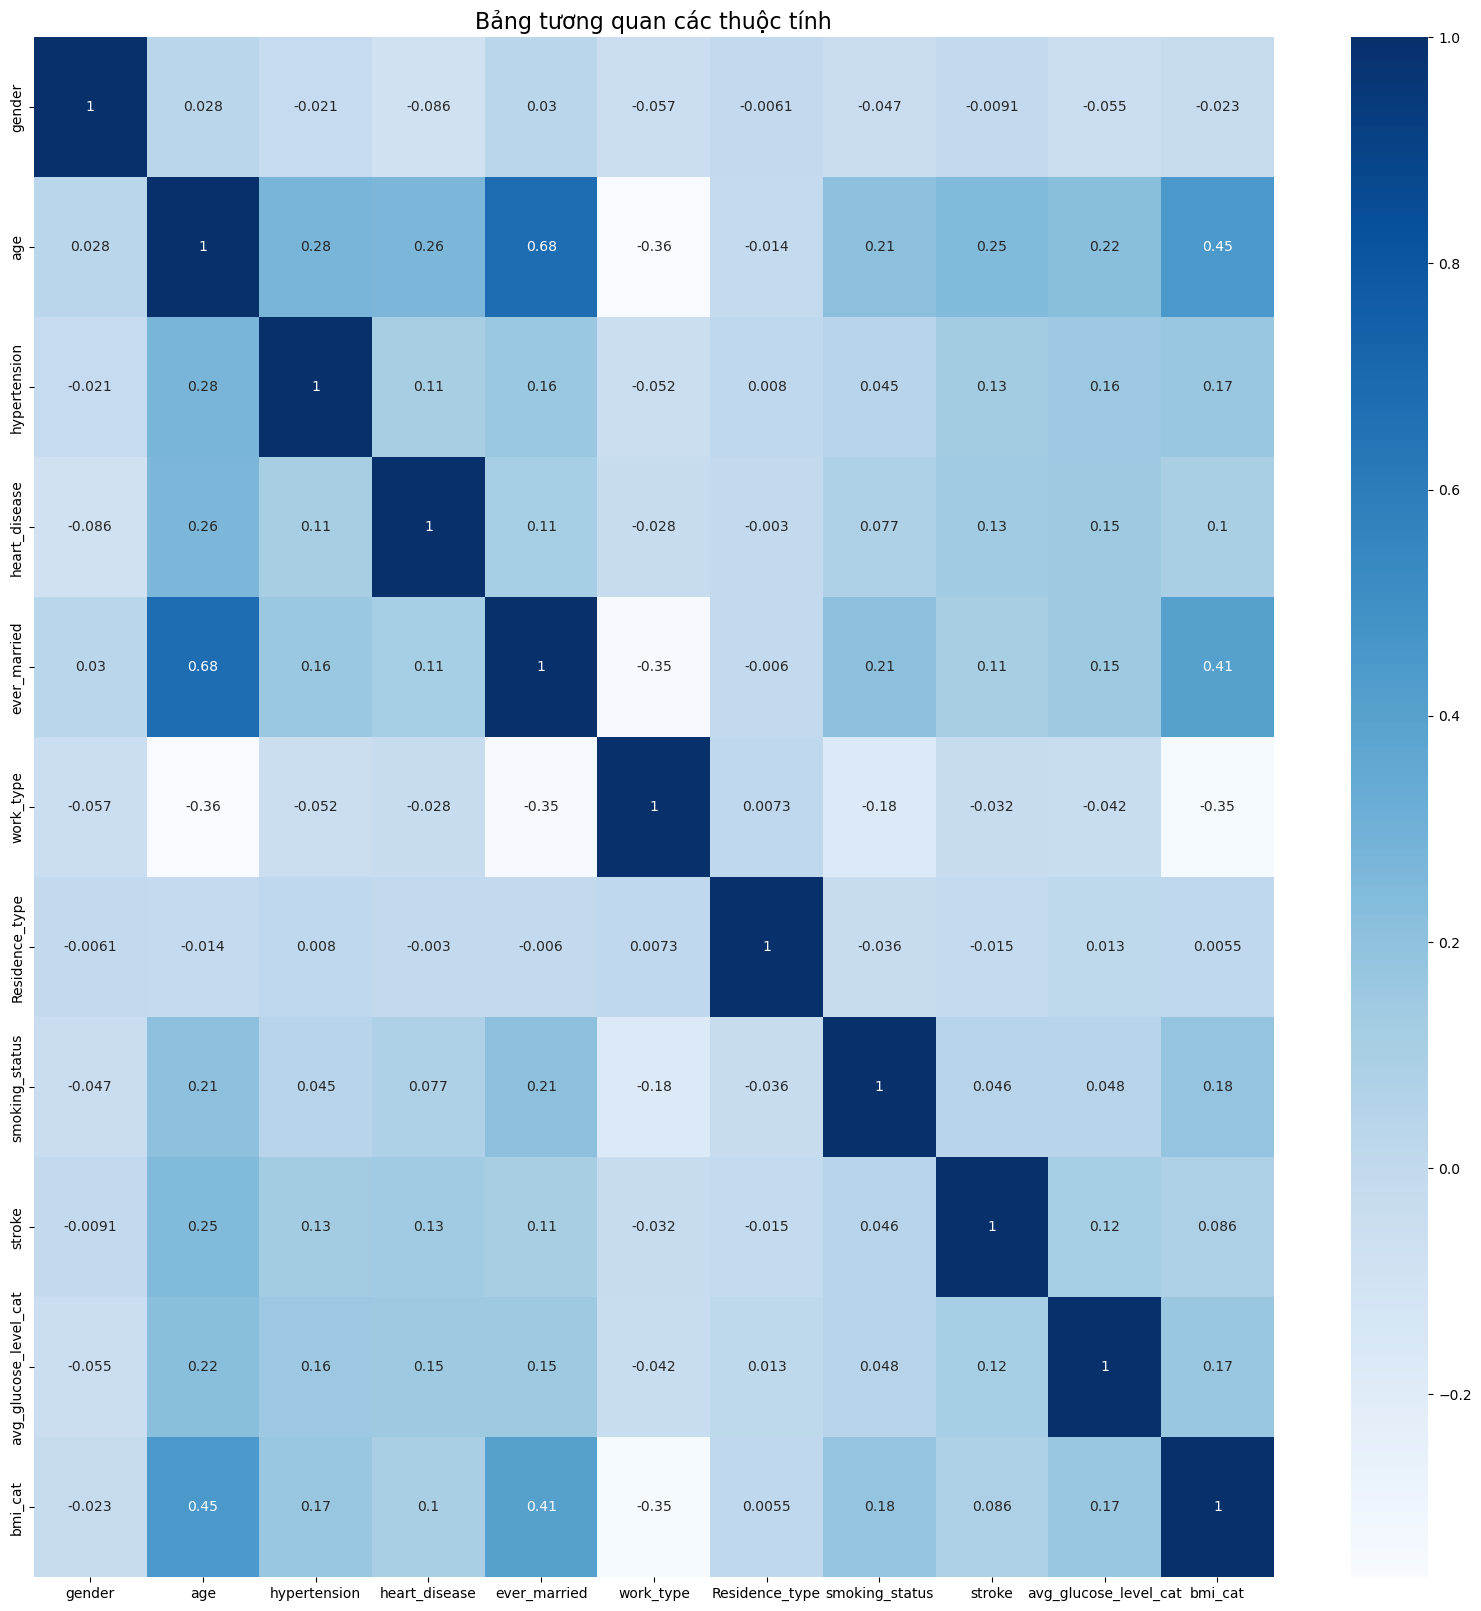

In [40]:
corr = df.corr()
plt.figure(figsize=(15, 20))
plt.title("Bảng tương quan các thuộc tính", fontsize=16)
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [31]:
# df = df.drop(columns=['ever_married'])
# df = df.drop(columns=['gender'])
# df = df.drop(columns=['work_type'])

In [32]:


# Tách features và target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Giả sử X_train, y_train là dữ liệu huấn luyện đã chia
# Gộp lại để dễ xử lý
train_data = pd.concat([X_train, y_train], axis=1)

# Tách riêng 2 lớp
no_stroke = train_data[train_data.stroke == 0]
stroke = train_data[train_data.stroke == 1]

# 1. Tăng mẫu (Upsample) cho lớp đột quỵ (stroke)
# Tăng lên cho bằng 50% số lượng lớp không đột quỵ hiện tại
n_minority_new = int(len(no_stroke) * 0.5)

stroke_upsampled = resample(stroke,
                            replace=True,     # Cho phép chọn lặp lại
                            n_samples=n_minority_new,
                            random_state=42)

# 2. Giảm mẫu (Downsample) cho lớp không đột quỵ (no_stroke)
# Giảm xuống sao cho tỷ lệ là 0.8 (stroke / no_stroke = 0.8)
n_majority_new = int(len(stroke_upsampled) / 0.8)

no_stroke_downsampled = resample(no_stroke,
                                 replace=False,    # Không chọn lặp lại
                                 n_samples=n_majority_new,
                                 random_state=42)

# Kết hợp lại
df_resampled = pd.concat([no_stroke_downsampled, stroke_upsampled])

# Tách lại ra X và y
X_resampled = df_resampled.drop('stroke', axis=1)
y_resampled = df_resampled['stroke']


print(y_resampled.value_counts())


stroke
0    2437
1    1950
Name: count, dtype: int64


In [33]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,avg_glucose_level_cat,bmi_cat
0,0,0.816895,0,1,1,0.50,0,0.5,1,1.000000,1.000000
1,1,0.743652,0,0,1,0.75,1,0.0,1,1.000000,1.000000
2,0,0.975586,0,1,1,0.50,1,0.0,1,0.333333,1.000000
3,1,0.597168,0,0,1,0.50,0,1.0,1,0.666667,1.000000
4,1,0.963379,1,0,1,0.75,1,0.0,1,0.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975586,1,0,1,0.50,0,0.0,0,0.000000,1.000000
5106,1,0.987793,0,0,1,0.75,0,0.0,0,0.333333,1.000000
5107,1,0.426270,0,0,1,0.75,1,0.0,0,0.000000,1.000000
5108,0,0.621582,0,0,1,0.50,1,0.5,0,0.666667,0.666667


In [34]:
# # Khởi tạo mô hình Random Forest
# rf = RandomForestClassifier(random_state=42)

# # Sử dụng Bayesian Optimization để tìm kiếm siêu tham số tốt nhất
# param_dist = {
#     'n_estimators': (100, 1000),
#     'max_depth': (5, 100),
#     'min_samples_split': (2, 20),
#     'min_samples_leaf': (1, 10),
#     'bootstrap': [True, False]
# }

# bayes_search = BayesSearchCV(estimator=rf
#                              , search_spaces=param_dist
#                              , n_iter=50
#                              , cv=5
#                              , n_jobs=-1
#                              , scoring='f1'
#                              , random_state=42)
# bayes_search.fit(X_resampled, y_resampled)
# best_params = bayes_search.best_params_

# # Tạo mô hình với siêu tham số tốt nhất
# best_rf = RandomForestClassifier(**best_params
#                                  , class_weight='balanced'
#                                  , random_state=42)

# # Huấn luyện mô hình
# best_rf.fit(X_resampled, y_resampled)

# # Thay vì predict ngay, hãy lấy xác suất
# y_prob = best_rf.predict_proba(X_test)
# y_prob_class_1 = y_prob[:, 1]

# # Tìm ngưỡng tốt nhất cho F1-score trên tập Test
# best_thresh = 0.5
# best_f1 = 0
# thresholds = np.arange(0.1, 0.6, 0.05) # Quét từ 0.1 đến 0.6

# for thresh in thresholds:
#     y_pred_temp = (y_prob_class_1 >= thresh).astype(int)
#     score = f1_score(y_test, y_pred_temp)
#     if score > best_f1:
#         best_f1 = score
#         best_thresh = thresh

# print(f"\nNgưỡng tối ưu (Threshold): {best_thresh}")
# print(f"F1-Score tốt nhất tại ngưỡng này: {best_f1:.4f}")
# # Dự đoán trên tập kiểm tra
# y_pred_final = (y_prob_class_1 >= best_thresh).astype(int)
# y_pred = y_pred_final

# # Đánh giá mô hình
# print(classification_report(y_test, y_pred))
# print("Độ chính xác của mô hình Random Forest là: ", best_rf.score(X_test, y_test)*100, "%")

# # Vẽ ma trận nhầm lẫn
# def plot_confusion_matrix(best_rf, X_test, y_test):
#     # Dự đoán trên tập kiểm tra
#     y_pred = best_rf.predict(X_test)
#     # Tính toán ma trận nhầm lẫn
#     cm = confusion_matrix(y_test, y_pred)
#     # Vẽ biểu đồ
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
#     plt.xlabel('Nhãn dự đoán')
#     plt.ylabel('Nhãn thực tế')
#     plt.title('Ma trận nhầm lẫn')
#     plt.show()

# # Gọi hàm để vẽ ma trận nhầm lẫn
# plot_confusion_matrix(best_rf, X_test, y_test)


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       508
           1       0.96      1.00      0.98       370

    accuracy                           0.98       878
   macro avg       0.98      0.98      0.98       878
weighted avg       0.98      0.98      0.98       878

Độ chính xác của mô hình Random Forest là:  98.17767653758543 %


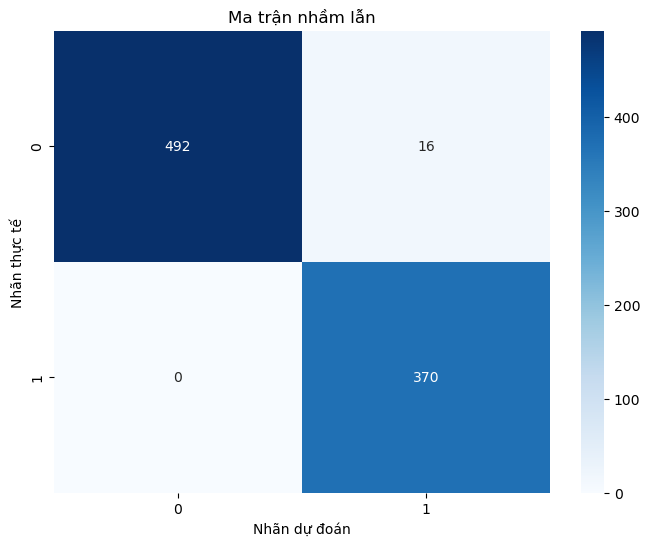

In [35]:
# Giả sử df là DataFrame chứa dữ liệu của bạn
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level_cat', 'bmi_cat', 'smoking_status']]
y = df['stroke']

# Tăng cường dữ liệu bằng SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(random_state=42)

# Sử dụng Bayesian Optimization để tìm kiếm siêu tham số tốt nhất
param_dist = {
    'n_estimators': (100, 1000),
    'max_depth': (5, 50),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10),
    'bootstrap': [True, False]
}

bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)
bayes_search.fit(X_train, y_train)
best_params = bayes_search.best_params_

# Tạo mô hình với siêu tham số tốt nhất
best_rf = RandomForestClassifier(**best_params, random_state=42)

# Huấn luyện mô hình
best_rf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = best_rf.predict(X_test)

# Đánh giá mô hình
print(classification_report(y_test, y_pred))
print("Độ chính xác của mô hình Random Forest là: ", best_rf.score(X_test, y_test)*100, "%")

# Vẽ ma trận nhầm lẫn
def plot_confusion_matrix(best_rf, X_test, y_test):
    # Dự đoán trên tập kiểm tra
    y_pred = best_rf.predict(X_test)
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    # Vẽ biểu đồ
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Nhãn dự đoán')
    plt.ylabel('Nhãn thực tế')
    plt.title('Ma trận nhầm lẫn')
    plt.show()

# Gọi hàm để vẽ ma trận nhầm lẫn
plot_confusion_matrix(best_rf, X_test, y_test)